## Day 31 Lecture 1 Assignment

In this assignment, we will learn about the K nearest neighbor algorithm. We will use the acute nephritis dataset loaded below and analyze the model generated for this datasett.

In [19]:
%matplotlib inline

import math

import matplotlib.pyplot as plt
import numpy as nps
import pandas as pd

In [20]:
# columns: 
# Temperature of patient { 35C-42C }
# Occurrence of nausea { yes, no }
# Lumbar pain { yes, no }
# Urine pushing (continuous need for urination) { yes, no }
# Micturition pains { yes, no }
# Burning of urethra, itch, swelling of urethra outlet { yes, no }
# decision: Nephritis of renal pelvis origin { yes, no } 

cols = ['temp', 'nausea', 'lumbar_pain', 'urine_pushing', 'micturition_pains', 'burning', 'nephritis']
nephritis = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/acute.csv', names=cols, na_values='NaN') # note, added na_values parameter

In [21]:
nephritis.head()

,temp,nausea,lumbar_pain,urine_pushing,micturition_pains,burning,nephritis
35,5,no,yes,no,no,no,no
35,9,no,no,yes,yes,yes,no
35,9,no,yes,no,no,no,no
36,0,no,no,yes,yes,yes,no
36,0,no,yes,no,no,no,no


First, check for missing data and remove all rows containing missing data

In [22]:
# answer below:
nephritis.isnull().sum()*100/nephritis.count()

temp                 0.0
nausea               0.0
lumbar_pain          0.0
urine_pushing        0.0
micturition_pains    0.0
burning              0.0
nephritis            0.0
dtype: float64

To use the data, we must convert all columns to numeric. Do this using the `get_dummies` function for all non-numeric columns.

Note: remember to drop the first value.

In [23]:
# answer below:

nephritis.info()
nephritis.iloc[:0,].T

''' 
current data types 
temp - int"
nausea - obj
lumbar_pain - obj
urine_pushing - obj
micturition_pains - obj
burning - obj '''

nephritis.columns
cols = ['nausea', 'lumbar_pain', 'urine_pushing', 'micturition_pains', 'burning', 'nephritis']

nephritis_numeric = pd.get_dummies(data=nephritis, columns=cols, dtype=float, drop_first=True)
# dummy_df.head(12)

# nephritis.shape #120,7
nephritis_numeric.shape == nephritis.shape #True
nephritis_numeric.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 35 to 41
Data columns (total 7 columns):
temp                 120 non-null int64
nausea               120 non-null object
lumbar_pain          120 non-null object
urine_pushing        120 non-null object
micturition_pains    120 non-null object
burning              120 non-null object
nephritis            120 non-null object
dtypes: int64(1), object(6)
memory usage: 7.5+ KB


Index(['temp', 'nausea_yes', 'lumbar_pain_yes', 'urine_pushing_yes',
       'micturition_pains_yes', 'burning_yes', 'nephritis_yes'],
      dtype='object')

Split the data into train and test. Use 20% of the data for our test subset. Use nephritis as the target variable.

In [24]:
# answer below:
import numpy as np
from sklearn.model_selection import train_test_split

X = nephritis_numeric.drop(axis=1, columns='nephritis_yes')
y = nephritis_numeric['nephritis_yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)



Generate a KNN model with k=5 for the dataset.  What is the accuracy score for the train and test subsamples?

In [25]:
# answer below:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)

knn.predict(X_test)
print(knn.score(X_train, y_train)) # accuracy
print(knn.score(X_test, y_test)) # accuracy


0.9791666666666666
0.9583333333333334


## The accuracy score for the train model is: 98%
## The accuracy score for the test model is: 95%

Would you say the model overfits? Why or why not? Put your answer in the comment below.

# answer below:
### Since the test model performed better than the train model, we can conclude that the model is overfit

Let's optimize k. Produce a plot with training and testing accuracy for a wide range of k.

In [26]:
train_accs = [] 
test_accs = []

min_k = 1 
max_k = X_train.shape[0] 

for k in range(min_k, max_k): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train)

    train_acc = knn.score(X_train, y_train) 
    test_acc = knn.score(X_test, y_test)

    train_accs.append(train_acc) 
    test_accs.append(test_acc)

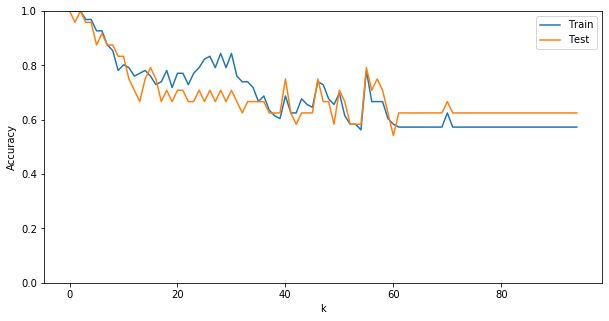

In [27]:
# answer below:
plt.figure(figsize=(10,5))
plt.plot(train_accs, label='Train')
plt.plot(test_accs, label='Test')

plt.xlabel('k')
plt.ylabel('Accuracy')
plt.ylim((0,1))

plt.legend()
plt.show()